<a href="https://colab.research.google.com/github/Barttje/summercourse-ml/blob/master/neural_network_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Codecentric Summercourse ML 
This is part one of the summercourse ML organised by Codecentric. 
## Neural network
In this tutorial we are going to explain how to create a neural network in Keras that is used for classifying the MNIST fashion data set. This is a dataset of 60.000 Zalando's article images.
Each training and test example is assigned to one of the following labels:
0. T-Shirt
1. Trouser
2. Dress
3. Coat
4. Sandal
5. Shirt
6. Sneaker
7. Bag
8. Ankle boot 


#Imports

In [1]:
import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt

Using TensorFlow backend.


#Data preprocessing

In [10]:
labels = {1:"T-Shirt", 2:"Trouser", 3:"Dress", 4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}
print(labels[2])

Trouser


In [6]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


The load_data() function on the dataset can be used for the datasets that are included in Keras. The other datasets that can be loaded in the same way can be found on the [Keras website](https://keras.io/datasets/). 
The load_data() function returns the train and test data set for the MNIST fashion data set. Both the test and train data are divided in two parts, the image and the label. x_train contains all the images we are going to use to train the neural network. The y_train contains all the labels for those images. 


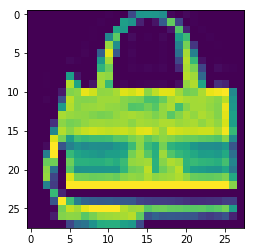

8
Bag


In [16]:
image_index = 9432 # Can be any number between 0 and 59999

plt.imshow(x_train[image_index])
plt.show()
print(y_train[image_index])
print(labels[y_train[image_index]])

The *matplotlib.pyplot as plt* can be used to show the images in the dataset. 
We also print the label of that image, which is a number between 1 and 9. Using the mapping we created earlier we can convert this number to the actual name of the label. 


In [17]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [0]:
image_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_size) # Transform from matrix to vector
x_train = x_train.astype('float32')
x_train /= 255 # Normalize inputs from 0-255 to 0.0-1.0

x_test = x_test.reshape(x_test.shape[0], image_size) # Transform from matrix to vector
x_test = x_test.astype('float32')
x_test /= 255 # Normalize inputs from 0-255 to 0.0-1.0

print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


Explain more about flattening

In [0]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape, y_test.shape)
print(y_train[0])

(60000, 10) (10000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Explain hot encoding

#Creating and training the neural network

In [0]:
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(image_size,))) # Input layer
model.add(Dense(units=num_classes, activation='softmax')) # Output layer
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


Explain layers in the model

In [0]:
epochs = 5
model.fit(x_train, y_train, epochs=epochs)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 15s 254us/step - loss: 0.4734 - acc: 0.8303
Epoch 2/5
60000/60000 [==============================] - 15s 246us/step - loss: 0.3596 - acc: 0.8680
Epoch 3/5
60000/60000 [==============================] - 15s 251us/step - loss: 0.3223 - acc: 0.8821
Epoch 4/5
60000/60000 [==============================] - 15s 243us/step - loss: 0.2995 - acc: 0.8885
Epoch 5/5
60000/60000 [==============================] - 15s 242us/step - loss: 0.2813 - acc: 0.8955


explain epochs, optionally batch_size, learning rate etc.

In [0]:
loss, accuracy  = model.evaluate(x_test, y_test)
print(loss, accuracy)

10000/10000 [==============================] - 1s 51us/step
0.38029201385974887 0.8639


explain loss and accuracy

#Applying the model

[[7.1326883e-07 3.0962204e-09 1.2298420e-04 1.2951722e-06 1.6472118e-02
  1.0906385e-09 9.8340285e-01 9.7340289e-11 1.5829835e-07 1.8515477e-09]]
6
6


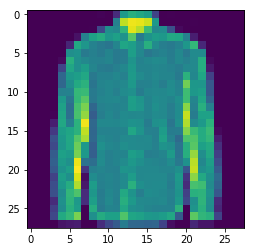

In [0]:
index = 123
pred = model.predict(x_test[-index:-index+1]) 
print(pred)
print(pred.argmax())
print(y_test[-index:-index+1].argmax())
plt.imshow(x_test[-index:-index+1][0].reshape(28,28))



explain prediction, explain arg max, compare with actual class